<a href="https://colab.research.google.com/github/cristiandarioortegayubro/Maestria-Ciencia-de-Datos-UBA-FCE/blob/main/Investigacion_Operativa/ORTEGA_YUBRO_Cadenas_de_Markov_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

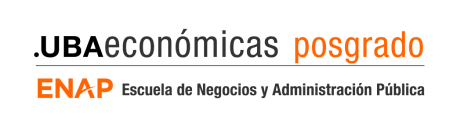

#### Maestría en Métodos Cuantitativos para la Gestión y Análisis de Datos en Organizaciones

#### Técnicas de Investigación Operativa para la Gestión - Cadenas de Markov

- María José BIANCO
- Verónica María GARCIA FRONTI
- Roberto Darío BACHINI

```
Maestrando: Cristian Darío ORTEGA YUBRO
```


#### Actividad de Evaluación 02 - Cadena de Markov

Las cuentas por cobrar de la empresa Majobi S.A. se clasifican en dos categorías: “A” corresponde a los deudores que no presentan mora, mientras que la categoría “B” contiene a deudores atrasados. A su vez, si luego de un proceso de reclamo judicial los deudores no responden, se los clasifica en la categoría “D” (default) y se supone que no se recupera nada de lo adeudado.

Majobi S.A. realiza un análisis mensual de la clasificación de sus deudores. En base a un análisis histórico, se estima que el 40% de los saldos de los deudores “A” seguirán en la misma categoría en el mes siguiente, mientras que un 20% pasarán a la categoría de morosos (“B”) y el resto pagará completamente el saldo deudor. Notar que los deudores “A” no pueden entrar en default de un mes a otro, dado que deben pasar por la categoría “B” antes.

Por otra parte, se estima que un 5% de los saldos deudores en la categoría “B” (morosos) caerán en default en el mes siguiente, mientras que un 10% responderá a los reclamos cancelando completamente su deuda. Asimismo, se estima que un 30% continuará en la misma categoría, mientras que el 55% restante pasará a la categoría “A” debido a una renegociación.

#### Instalando paquetes

In [1]:
install.packages("markovchain")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("diagram")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#### Habilitando librerias

In [3]:
library(markovchain)
library(shape)
library(diagram)

Package:  markovchain
Version:  0.8.6
Date:     2021-05-17
BugReport: https://github.com/spedygiorgio/markovchain/issues




##### Suponga que la evolución de los saldos deudores se puede analizar mediante una cadena de Markov.

**1. Construya la matriz de transición mensual y realice el Diagrama de Transición correspondiente.**

In [4]:
estados <- c("A", "B")
MatrizDeudores <- matrix(c(0.80,0.20,
                           0.55,0.45),byrow = T, ncol=2)

In [5]:
colnames(MatrizDeudores) = rownames(MatrizDeudores) = estados

Luego la matriz de transición es $P=\begin{pmatrix} 0.80 & 0.20 \\ 0.55 & 0.45\end{pmatrix} $ y se puede modelar con una cadena de Markov de dos estados...

#### Matriz de Transición

In [6]:
MatrizDeudores

,A,B
A,0.80,0.20
B,0.55,0.45


#### Objeto Markovchain

In [7]:
CuentasPorCobrar <- new("markovchain", transitionMatrix = MatrizDeudores)
CuentasPorCobrar

Unnamed Markov chain 
 A  2 - dimensional discrete Markov Chain defined by the following states: 
 A, B 
 The transition matrix  (by rows)  is defined as follows: 
     A    B
A 0.80 0.20
B 0.55 0.45


#### Diagrama de Transición

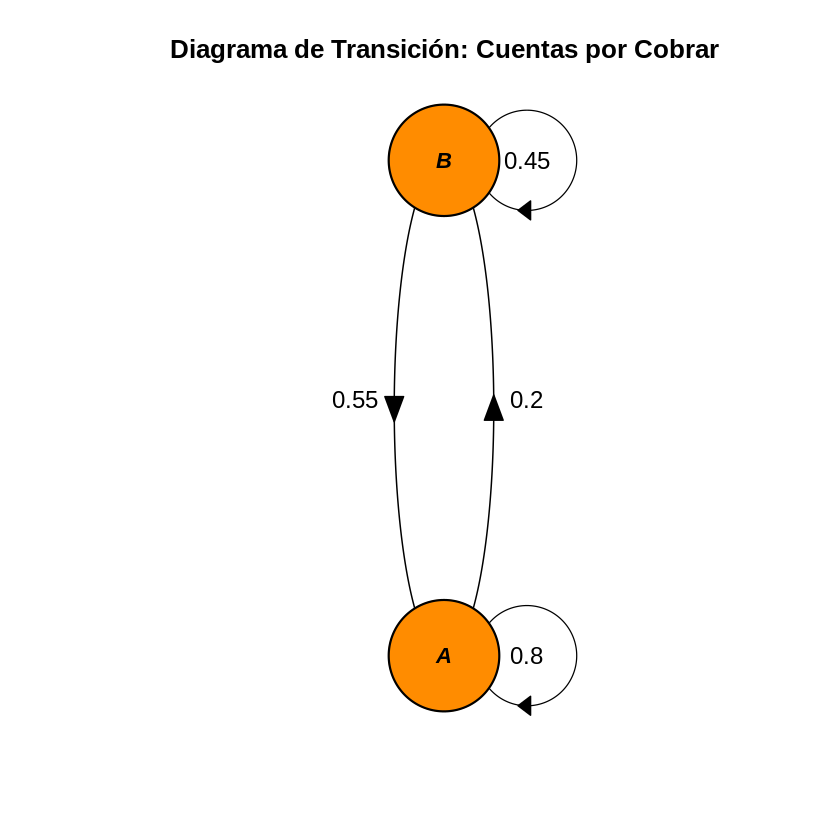

In [8]:
plotmat(t(CuentasPorCobrar@transitionMatrix),
        box.type = "circle", shadow.size = 0, txt.col = "black", txt.font = 4,
        box.lwd = 1.75, box.size = 0.08, box.col = "darkorange", box.cex = 1.1,
        arr.col = "black", arr.width = 0.3, arr.length = 0.4,
        arr.type ="triangle", arr.lwd = 1.2, arr.lcol = "black",
        cex.txt = 1.2, curve = 0.09,
        self.cex = 0.9,
        self.shiftx = c(0.12, 0.12),
        self.shifty = c(+0.00, +0.00),
        self.arrpos = c(1.5*pi, 1.5*pi, 0.5*pi),
        main = "Diagrama de Transición: Cuentas por Cobrar", cex = 1.3)

**2. Calcule la probabilidad de que un saldo de deuda clasificado “B” al final de un mes sea finalmente cancelado (en el largo plazo).**

Como se ha visto, la matriz de transiciones $P$ define la probabilidad de que la cadena pase del estado $s_i$ a otro estado $s_j$ en una unidad de tiempo.

$$P_{i,j}=P(\frac{X_{n+1}=s_j}{X_n=s_i})$$

In [9]:
(FinalDelMes = CuentasPorCobrar^2)

Unnamed Markov chain^2 
 A  2 - dimensional discrete Markov Chain defined by the following states: 
 A, B 
 The transition matrix  (by rows)  is defined as follows: 
       A      B
A 0.7500 0.2500
B 0.6875 0.3125


Entonces la probabilidad de que el saldo a fin de mes sea cancelado según la matriz de transición en dos pasos es 0.25. Es decir $P=0.25$

___

**3. Si Majobi SA tiene actualmente cuentas por cobrar por  \$ 100.000 clasificados como “A” y \$ 50.000 clasificados como “B”, ¿cuánto esperaría cobrar la empresa y cuánto se consideraría irrecuperable?**

In [10]:
A = 100000
B = 50000

In [11]:
estadoscolumnas <- c("A", "B", "D")
estadosfilas <- c("A", "B")

In [12]:
MatrizDeudoresValor <- matrix(c(0.80, 0.20, 0.95,
                                0.55, 0.45, 0.05), byrow = T, ncol=3)

In [13]:
MatrizDeudoresValor

0.80,0.20,0.95
0.55,0.45,0.05


In [14]:
colnames(MatrizDeudoresValor) = estadoscolumnas
rownames(MatrizDeudoresValor) = estadosfilas

In [15]:
MatrizDeudoresValor

,A,B,D
A,0.80,0.20,0.95
B,0.55,0.45,0.05


In [16]:
MatrizDeudoresValor <- matrix(c(0.80 * A, 0.20 * A, 0.95 * B,
                                0.55 * B, 0.45 * B, 0.05 * B), byrow = T, ncol=3)

In [17]:
MatrizDeudoresValor

80000,20000,47500
27500,22500,2500


La empresa de los \$ 100.000 espera cobrar \$ 80.000 y lo que considera irrecuperable es \$ 2.500
___

**4. Luego de una reunión con el equipo gerencial, y debido al pronóstico recesivo de la economía, se estima un empeoramiento en el cobro. Se espera que solamente un 30% de los saldos en “A” se paguen completamente cada mes, y que un 30% se mantenga en la misma categoría al mes siguiente. Por otra parte, de los saldos clasificados como “B”, se espera que el 15% entre en default cada mes, y que solamente el 5% cancele completamente su deuda; a su vez, solamente por el 30% del saldo se llegará a un acuerdo y se reclasificará como “A”. Se pide que realice nuevamente la estimación del punto anterior considerando este nuevo escenario económico.**

In [18]:
MatrizDeudores2 <- matrix(c(0.70,0.30,
                            0.30,0.70), byrow = T, ncol=2)

In [20]:
colnames(MatrizDeudores2) = rownames(MatrizDeudores2) = estados

In [21]:
MatrizDeudores2

,A,B
A,0.7,0.3
B,0.3,0.7


In [22]:
CuentasPorCobrar3 <- new("markovchain", transitionMatrix = MatrizDeudores2)
CuentasPorCobrar3

Unnamed Markov chain 
 A  2 - dimensional discrete Markov Chain defined by the following states: 
 A, B 
 The transition matrix  (by rows)  is defined as follows: 
    A   B
A 0.7 0.3
B 0.3 0.7


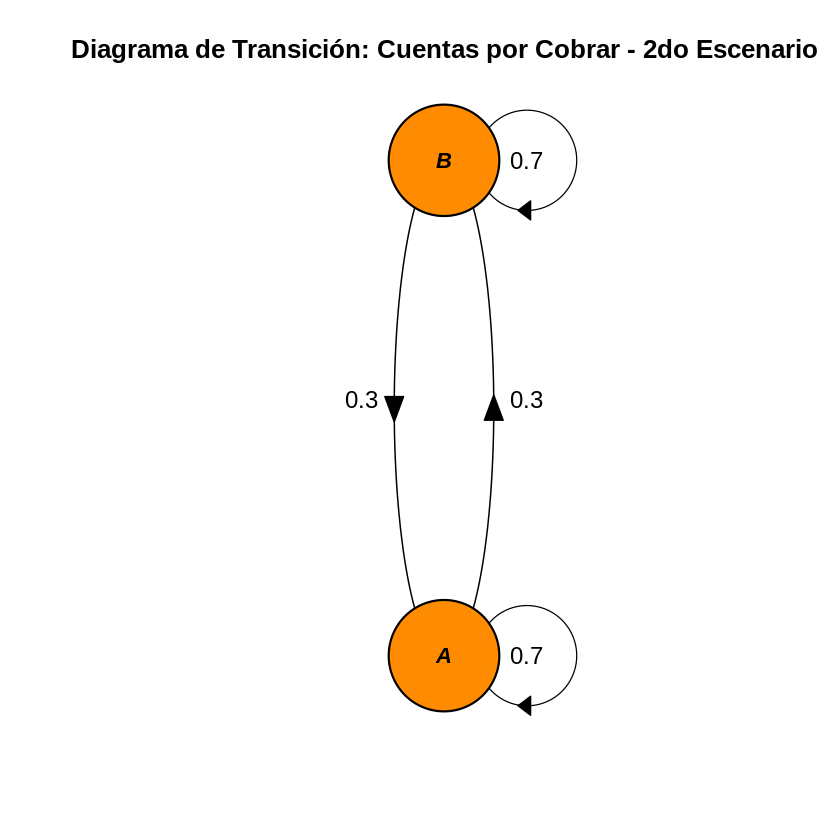

In [23]:
plotmat(t(CuentasPorCobrar3@transitionMatrix),
        box.type = "circle", shadow.size = 0, txt.col = "black", txt.font = 4,
        box.lwd = 1.75, box.size = 0.08, box.col = "darkorange", box.cex = 1.1,
        arr.col = "black", arr.width = 0.3, arr.length = 0.4,
        arr.type ="triangle", arr.lwd = 1.2, arr.lcol = "black",
        cex.txt = 1.2, curve = 0.09,
        self.cex = 0.9,
        self.shiftx = c(0.12, 0.12),
        self.shifty = c(+0.00, +0.00),
        self.arrpos = c(1.5*pi, 1.5*pi, 0.5*pi),
        main = "Diagrama de Transición: Cuentas por Cobrar - 2do Escenario", cex = 1.3)